In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("C:\workspace\python-work\python 3\cs229-machine_learning-implement\ec-code\ex2-logistic regression\ex2data1.txt",
               names=["Exam1","Exam2","Admitted"])
print(data.head())


positive=data[ data["Admitted"].isin([1]) ]
negative=data[ data["Admitted"].isin([0]) ]
print(positive.head())
print(negative.head())

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
       Exam1      Exam2  Admitted
3  60.182599  86.308552         1
4  79.032736  75.344376         1
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
        Exam1      Exam2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
5   45.083277  56.316372         0
10  95.861555  38.225278         0


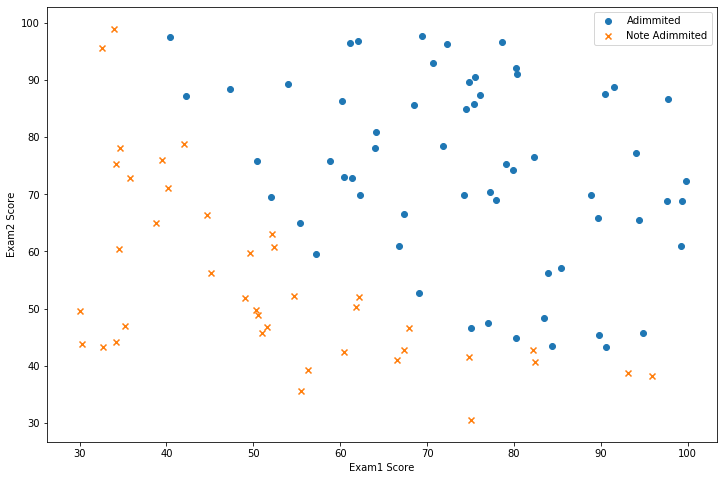

In [2]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive["Exam1"],positive["Exam2"],marker="o",label="Adimmited")
ax.scatter(negative["Exam1"],negative["Exam2"],marker="x",label="Note Adimmited")
ax.legend()  #显示右上角的icon
ax.set_xlabel("Exam1 Score")
ax.set_ylabel("Exam2 Score")
plt.show()

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# num=np.arange(-10,10)
# print(num,type(num))
# 
# fig,ax=plt.subplots(figsize=(12,8))
# ax.plot(num,sigmoid(num),"r")   # r 表示 颜色，红色


data.insert(0,"ones",1)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(X.head(),y.head(),type(y))

   ones      Exam1      Exam2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552
4     1  79.032736  75.344376 0    0
1    0
2    0
3    1
4    1
Name: Admitted, dtype: int64 <class 'pandas.core.series.Series'>


In [4]:
theta=np.zeros(X.shape[1])
#print(theta,theta.shape)       #[0. 0. 0.] (3,)

def cost(theta,X,y):
    a= sigmoid(X @ theta)
    cost_arr=-y * np.log(a) -(1-y) *np.log(1-a) 
    cost=np.sum(cost_arr)/X.shape[0]
    return cost

#求出theta对于costfunction的倒数  dw=( X @ dZ.T )/m
def gradient(theta,X,y):
    Z=theta @ X.T
    A=sigmoid(Z)
    dZ=A- y.T
    dw=(X.T @ dZ.T )/ X.shape[0]
    return dw

first_cost=cost(theta , X ,y)
first_gradient=gradient(theta,X,y)
print("first_cost=",first_cost,"\nfirst_gradient=",first_gradient.values)

first_cost= 0.6931471805599453 
first_gradient= [ -0.1        -12.00921659 -11.26284221]


In [5]:
# theta=np.zeros(X.shape[1])
# def batch_gradient_descent(theta,X,y,epoch,alpha=0.0001):
#     cost_arr=[cost(theta,X,y)]
#     new_theta=theta.copy()
#     for i in range(epoch):
#         new_theta=new_theta-alpha*gradient(new_theta,X,y)
#         cost_arr.append(cost(new_theta,X,y))
#     return new_theta,cost_arr
# final_theta,cost_arr=batch_gradient_descent(theta,X,y,1000)
# print(final_theta,cost_arr[0],cost_arr[-1])

#cout  0.6293338861493855
#这里没有执行梯度下降，  计算单独的梯度。在这个练习中，一个叫 fminunc 的 
# Octave 函数是用来优化给定函数的参数的以计算代价和梯度的。既然我们在用 python ，
# 我们可以使用 SciPy 的优化 API 来实现相同功能。
import scipy.optimize as opt  
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))  
print("result=",result, "\nresult[0]=",result[0])
print("final_cost=",cost(result[0], X, y)  )


result= (array([-25.16131853,   0.20623159,   0.20147149]), 36, 0) 
result[0]= [-25.16131853   0.20623159   0.20147149]
final_cost= 0.203497701589475


In [6]:
#算出预测  精确度
def predict(theta,X):
    probability=sigmoid(X @ theta)
    return [1 if x >0.5 else 0  for x in probability]
final_theta=result[0]
prediction=predict(final_theta,X)

# def get_accuracy (prediciton_arr,y):
#     prediction_right_num=0
#     for i in range(len(prediction)):
#         if prediction[i]==y[i]:
#             prediction_right_num+=1
#     return prediction_right_num/len(prediction)
# accuracy=get_accuracy(prediction,y)
# print ('accuracy = {0}%'.format(accuracy*100))     #cout    accuracy = 89.0%

from sklearn.metrics import classification_report   # 这个包是评价报告
print(classification_report(y,prediction))
        


              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



[124.88774032  -1.02362668  -1.        ]


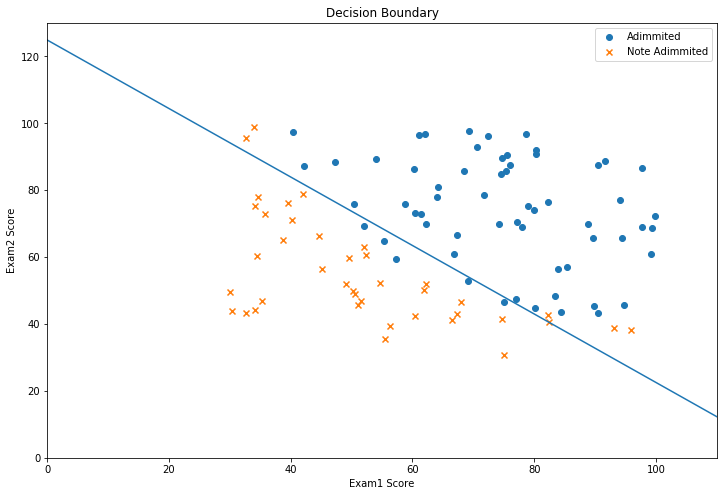

In [7]:
#plot decison boundary
coef_final_theta=-result[0]/result[0][2]  #find the equation of decison boundary
print(coef_final_theta)

x=np.arange(120)

fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(positive["Exam1"],positive["Exam2"],marker="o",label="Adimmited")
plt.scatter(negative["Exam1"],negative["Exam2"],marker="x",label="Note Adimmited")
plt.plot(x,x*coef_final_theta[1]+coef_final_theta[0])
plt.legend()  #显示右上角的icon
ax.set_xlabel("Exam1 Score")
ax.set_ylabel("Exam2 Score")
plt.title("Decision Boundary")
plt.xlim(0,110)
plt.ylim(0,130)
plt.show()

      test1    test2  accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1


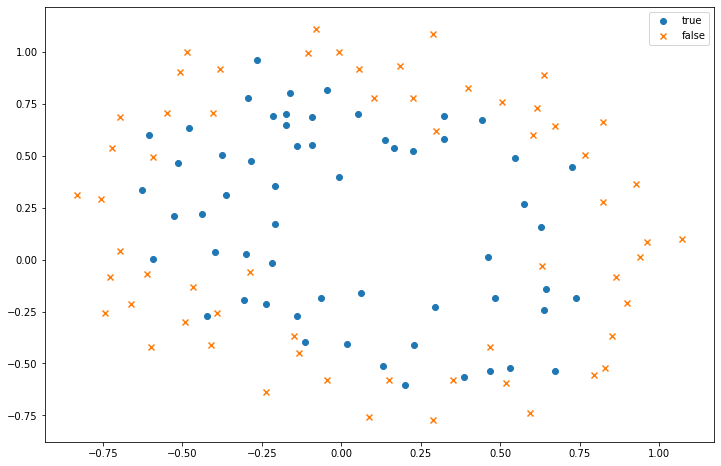

   accepted  F00       F10      F01       F20       F11       F02       F30  \
0         1  1.0  0.051267  0.69956  0.002628  0.035864  0.489384  0.000135   
1         1  1.0 -0.092742  0.68494  0.008601 -0.063523  0.469143 -0.000798   
2         1  1.0 -0.213710  0.69225  0.045672 -0.147941  0.479210 -0.009761   
3         1  1.0 -0.375000  0.50219  0.140625 -0.188321  0.252195 -0.052734   
4         1  1.0 -0.513250  0.46564  0.263426 -0.238990  0.216821 -0.135203   

        F21       F12  ...       F23       F14       F05           F60  \
0  0.001839  0.025089  ...  0.000900  0.012278  0.167542  1.815630e-08   
1  0.005891 -0.043509  ...  0.002764 -0.020412  0.150752  6.362953e-07   
2  0.031616 -0.102412  ...  0.015151 -0.049077  0.158970  9.526844e-05   
3  0.070620 -0.094573  ...  0.017810 -0.023851  0.031940  2.780914e-03   
4  0.122661 -0.111283  ...  0.026596 -0.024128  0.021890  1.827990e-02   

            F51       F42       F33       F24       F15       F06  
0  2.477505e

In [8]:
#regularized logistic regression  正则化
data2=pd.read_csv("C:\workspace\python-work\python 3\cs229-machine_learning-implement\ec-code\ex2-logistic regression\ex2data2.txt",
               names=["test1","test2","accepted"])
print(data2.head())


positive2=data2[ data2["accepted"].isin([1]) ]
negative2=data2[ data2["accepted"].isin([0]) ]

fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(positive2["test1"],positive2["test2"],marker="o",label="true")
plt.scatter(negative2["test1"],negative2["test2"],marker="x",label="false")
plt.legend()
plt.show()


degree =6
x1 = data2['test1']
x2 = data2['test2']
#h(x)=g(theta0+theta1*x1+theta2*x2+theta3*x1**2+theta4*x1*x2+theta5*x2**2+
#       theta6*x1**3+theta7*x1**2*x2+theta8*x1*x2**2+theta9*x2**3)
for i in range(1+degree):
    for j in range(1+i):   
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('test1', axis=1, inplace=True)
data2.drop('test2', axis=1, inplace=True)

print(data2.head())

In [9]:
X2=data2.iloc[:,1:]
y2=data2.iloc[:,0]
print(X2.head(),"\n",y2.head())

theta2=np.zeros(X2.shape[1])


def cost2(theta,X,y,lambda2=1):
    new_theta=theta[1:]
    cost_num=cost(theta,X,y)+np.power(new_theta,2).sum()*lambda2/(2*X2.shape[0])
    return cost_num

#求出theta2对于costfunction2的倒数  dw=( X @ dZ.T )/m
def gradient2(theta,X,y,lambda2=1):
    all=gradient(theta,X,y)+(lambda2 *theta)/(X.shape[0])
    return all


print("first_cost=",cost2(theta2, X2 ,y2))

first_gradient2=gradient2(theta2,X2,y2)
print("first_gradient=",first_gradient2)

   F00       F10      F01       F20       F11       F02       F30       F21  \
0  1.0  0.051267  0.69956  0.002628  0.035864  0.489384  0.000135  0.001839   
1  1.0 -0.092742  0.68494  0.008601 -0.063523  0.469143 -0.000798  0.005891   
2  1.0 -0.213710  0.69225  0.045672 -0.147941  0.479210 -0.009761  0.031616   
3  1.0 -0.375000  0.50219  0.140625 -0.188321  0.252195 -0.052734  0.070620   
4  1.0 -0.513250  0.46564  0.263426 -0.238990  0.216821 -0.135203  0.122661   

        F12       F03  ...       F23       F14       F05           F60  \
0  0.025089  0.342354  ...  0.000900  0.012278  0.167542  1.815630e-08   
1 -0.043509  0.321335  ...  0.002764 -0.020412  0.150752  6.362953e-07   
2 -0.102412  0.331733  ...  0.015151 -0.049077  0.158970  9.526844e-05   
3 -0.094573  0.126650  ...  0.017810 -0.023851  0.031940  2.780914e-03   
4 -0.111283  0.100960  ...  0.026596 -0.024128  0.021890  1.827990e-02   

            F51       F42       F33       F24       F15       F06  
0  2.477505e

In [10]:
#最优迭代
import scipy.optimize as opt  
result2 = opt.fmin_tnc(func=cost2, x0=theta2, fprime=gradient2, args=(X2, y2))  
print("result=",result2,   "\nresult[0]=",result2[0])
print("final_cost=",cost2(result2[0], X2, y2) ) 

result= (array([ 1.14796988,  0.60123605,  1.17054685, -1.88314305, -0.91466193,
       -1.26549982,  0.12673689, -0.36683795, -0.34725935, -0.18060682,
       -1.42423093, -0.05779677, -0.60630953, -0.26718965, -1.16593274,
       -0.23500924, -0.20754922, -0.05006263, -0.27921475, -0.2829903 ,
       -0.47646173, -1.02992509,  0.0241116 , -0.29378828,  0.01238152,
       -0.32816826, -0.13343804, -0.93372164]), 55, 4) 
result[0]= [ 1.14796988  0.60123605  1.17054685 -1.88314305 -0.91466193 -1.26549982
  0.12673689 -0.36683795 -0.34725935 -0.18060682 -1.42423093 -0.05779677
 -0.60630953 -0.26718965 -1.16593274 -0.23500924 -0.20754922 -0.05006263
 -0.27921475 -0.2829903  -0.47646173 -1.02992509  0.0241116  -0.29378828
  0.01238152 -0.32816826 -0.13343804 -0.93372164]
final_cost= 0.5295810559638835


In [11]:
#算出预测  精确度
final_theta2=result2[0]
prediction2=predict(final_theta2,X2)
print(classification_report(y2,prediction2))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



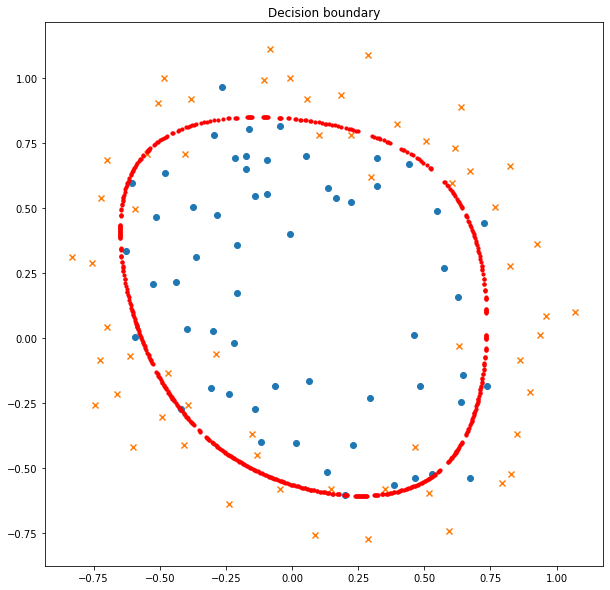

In [13]:
def feature_mapping(x1, x2, power):
    data = {'f' + str(i-j) + str(j): np.power(x1, i - j) * np.power(x2, j)
                for i in np.arange(power + 1)
                for j in np.arange(i + 1)
            }
    return pd.DataFrame(data)



def draw_boundary(power, l):
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    # print("final_theta=",final_theta)
    
    x, y = find_decision_boundary(density, power, final_theta, threshhold)
   
    df=pd.read_csv("C:\workspace\python-work\python 3\cs229-machine_learning-implement\ec-code\ex2-logistic regression\ex2data2.txt",
               names=["test1","test2","accepted"])
    
    positive=df[ df["accepted"].isin([1]) ]
    negative=df[ df["accepted"].isin([0]) ]
    
    plt.subplots(figsize=(10,10))
    plt.scatter(positive["test1"],positive["test2"],marker="o",label="true")
    plt.scatter(negative["test1"],negative["test2"],marker="x",label="false")
    plt.scatter(x, y, c='r', s=10)
    plt.title('Decision boundary')
    plt.show()



def feature_mapped_logistic_regression(power, l):

    df=pd.read_csv("C:\workspace\python-work\python 3\cs229-machine_learning-implement\ec-code\ex2-logistic regression\ex2data2.txt",
                  names=["test1","test2","accepted"])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
   
    
    X = feature_mapping(x1, x2, power)
    y = np.array(df.iloc[:, -1])
    
    theta = np.zeros(X.shape[1])
    
    import scipy.optimize as opt  
    res = opt.minimize(fun=cost2,x0=theta, args=(X, y, l), method='TNC',jac=gradient2)
    final_theta = res.x

    return final_theta





def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)
    
    cordinates = [(x, y) for x in t1 for y in t2]
    
    x_cord, y_cord = zip(*cordinates)
    
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord @ theta
    #  np.abs(inner_product)~~0  表示 decision boundary
    bool_arr= np.abs(inner_product.values)<threshhold
    x1=[]   #x1表示横坐标
    x2=[]   #x2表示纵坐标
    for i in range(len(cordinates)):
        if bool_arr[i]:
            x1.append(cordinates[i][0])
            x2.append(cordinates[i][1])
    return x1,x2
    #decision = mapped_cord[  np.abs(inner_product) < threshhold  ]
    #print(decision)
    # return decision.f10, decision.f01


draw_boundary(power=6, l=1)   #lambda=1


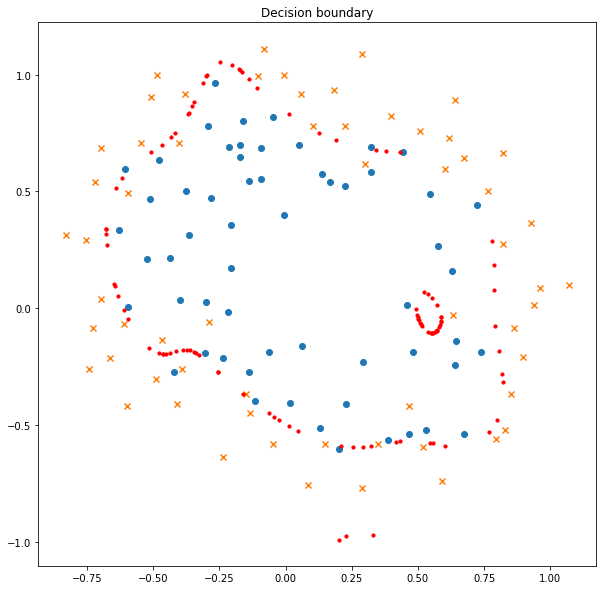

In [15]:
draw_boundary(power=6, l=0) 


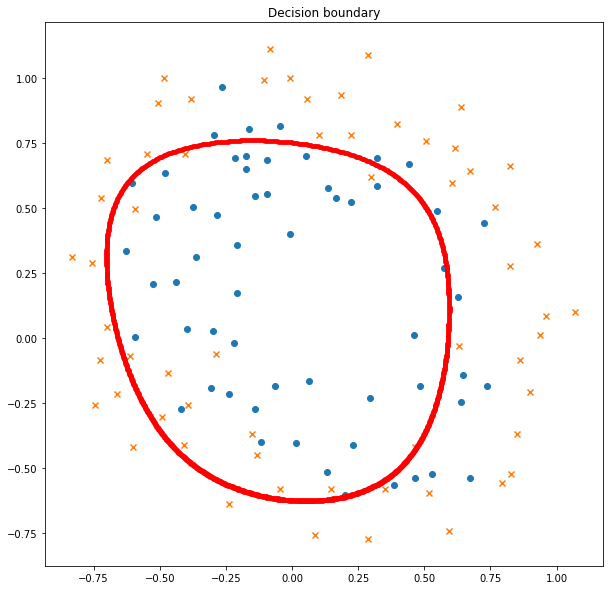

In [16]:
draw_boundary(power=6, l=10) 


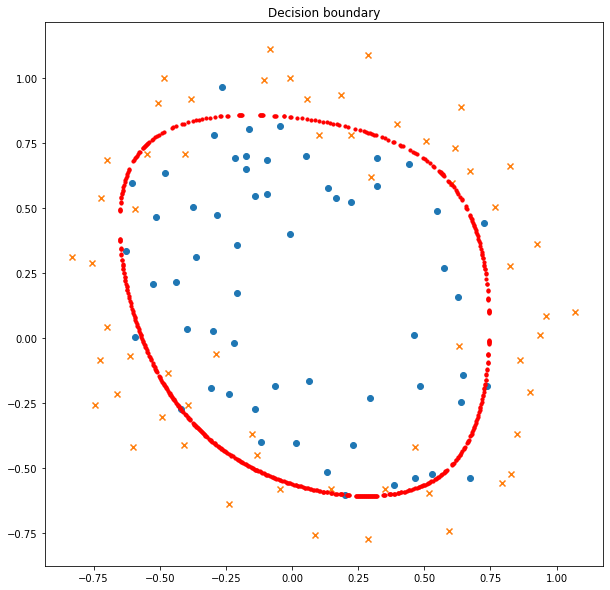

In [17]:
draw_boundary(power=10, l=1)   


